In [6]:
import numpy as np
from TDD2.TDD import Ini_TDD,Clear_TDD,set_index_order,get_tdd,get_count

from TDD2.TDD_Q import cir_2_tn,get_real_qubit_num,add_trace_line,add_inputs,add_outputs
from TDD2.TDD_Q import reshape as reshape2
from TDD2.TN import Index,Tensor,TensorNetwork
import time
import random
from qiskit import QuantumCircuit
from sympy import *
from sympy.parsing.sympy_parser import parse_expr
from TDD2.TDD import get_unique_table_num as gu1
from TDD2.BDD import get_unique_table_num as gu2
from TDD2.BDD import get_count as B_get_count
import matplotlib.pyplot as plt

10
^^ <class 'int'>


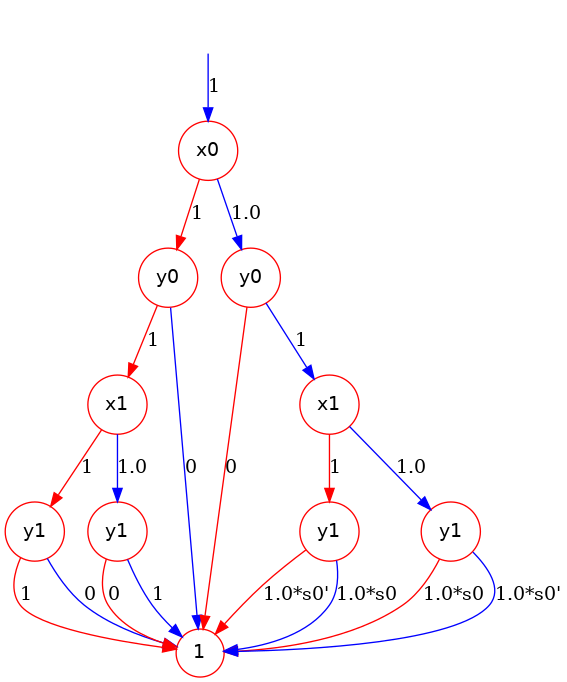

In [7]:
# from TDD2 import BDD
Ini_TDD(['x0','y0','x1','y1'],['s0'])
x=symbols('s0')
nx=symbols('sn0')
U=np.array([[1,0,0,0],[0,1,0,0],[0,0,nx,x],[0,0,x,nx]])
# U=np.array([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
U=reshape2(U)
# print(U)
var=[Index('x0'),Index('y0'),Index('x1'),Index('y1')]
ts1=Tensor(U,var)
tdd=ts1.tdd()
print(tdd.node_number())
print('^^',type(tdd.node.key))
# tdd.weight=BDD.BDD(BDD.Node(0.5))
# tdd.node.out_weight=[BDD.BDD(BDD.Node(2)),BDD.BDD(BDD.Node(2))]

tdd.show()

In [8]:
type(tdd.weight)

TDD2.BDD.BDD

In [9]:
def global_norm(node,weight):
    if node.key==-1:
        return weight
    h=weight
    f=node.out_weight[0]
    g=node.out_weight[1]
    node.out_weight[0]=h*f
    node.out_weight[1]=h*g

    node.out_weight[0]=global_norm(node.successor[0],weight= node.out_weight[0])
    node.out_weight[1]=global_norm(node.successor[1],weight= node.out_weight[1])

    def loc_norm(node):
        [f,g]=node.out_weight
        [h,f_p,g_p]=g.self_normalize(f)
        node.out_weight[0]=f_p
        node.out_weight[1]=g_p
        return h

    h_p=loc_norm(node)

    return h_p

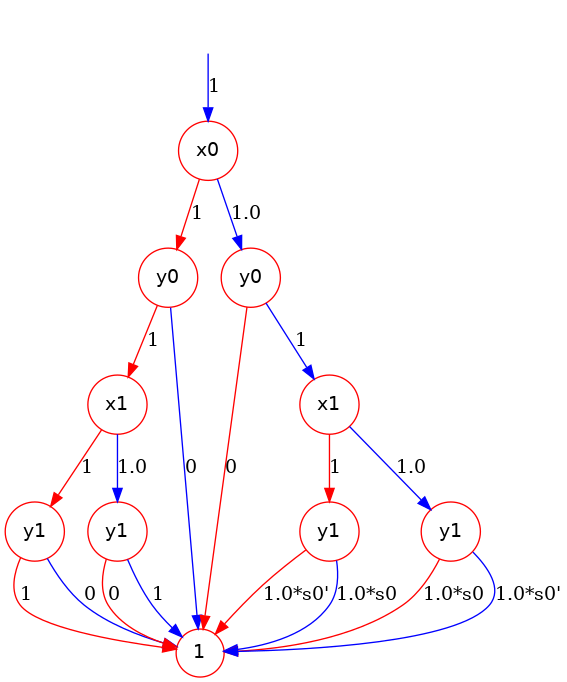

In [10]:
tdd.weight=global_norm(tdd.node, tdd.weight)
tdd.show()